In [1]:
!unzip "/content/Copy of devnagari digit.zip"

Streaming output truncated to the last 5000 lines.
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10299.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10300.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10301.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10302.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10303.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10304.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10306.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10307.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104017.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104018.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104019.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104021.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104023.p

Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


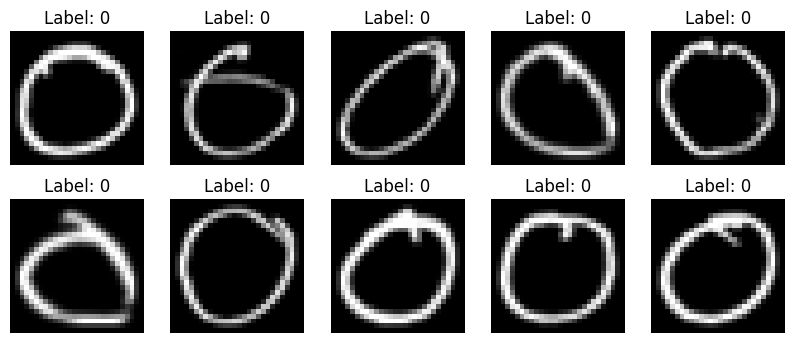

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image # Import Pillow
# Define dataset paths
train_dir = "/content/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/DevanagariHandwrittenDigitDataset/Test"
# Define image size
img_height, img_width = 28, 28
# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((img_width, img_height))  # Resize to (28,28)
            img = np.array(img) / 255.0  # Normalize pixel values to [0,1]
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)
# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1) # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")
# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()


#Task 1 (Data Preparation)

In [3]:
import zipfile
import os

# Define the path to the uploaded zip file and extraction directory
zip_path = '//content/Copy of devnagari digit.zip'
extraction_dir = '/content/DevanagariHandwrittenDigitDataset'

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# List extracted folders to verify
extracted_folders = os.listdir(extraction_dir)
extracted_folders


['Train', 'Test', 'DevanagariHandwrittenDigitDataset']

#Checking the contents inside folder

In [4]:
# Check the contents inside 'DevanagariHandwrittenDigitDataset' to find train/test folders
dataset_main_dir = os.path.join(extraction_dir, 'DevanagariHandwrittenDigitDataset')
dataset_contents = os.listdir(dataset_main_dir)
dataset_contents


['Train', 'Test']

#Data Preparation of 'Train'

In [5]:
# List class folders inside the Train directory
train_dir = os.path.join(dataset_main_dir, 'Train')
class_folders = os.listdir(train_dir)
class_folders_sorted = sorted(class_folders)  # Ensure label order is consistent
class_folders_sorted


['digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

#Data Preparation of 'Test'

In [6]:
# List class folders inside the Train directory
train_dir = os.path.join(dataset_main_dir, 'Test')
class_folders = os.listdir(train_dir)
class_folders_sorted = sorted(class_folders)  # Ensure label order is consistent
class_folders_sorted


['digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

In [7]:
class_folders = sorted(os.listdir(train_dir))

In [8]:
def load_images(base_dir, class_folders, image_size=(28, 28)):
    images = []
    labels = []
    for label_index, folder in enumerate(class_folders):
        folder_path = os.path.join(base_dir, folder)
        for filename in os.listdir(folder_path):
            if filename.endswith('.png'):
                img_path = os.path.join(folder_path, filename)
                img = Image.open(img_path).convert('L')  # Grayscale
                img = img.resize(image_size)
                img_array = np.array(img) / 255.0  # Normalize
                images.append(img_array)
                labels.append(label_index)
    return np.array(images), np.array(labels)

In [9]:
# Load data
X_train, y_train = load_images(train_dir, class_folders)
X_test, y_test = load_images(test_dir, class_folders)


In [10]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [11]:
y_train_ohe = to_categorical(y_train, num_classes=10)
y_test_ohe = to_categorical(y_test, num_classes=10)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

# --- Build FCN Model with Input Layer ---
model = Sequential([
    Input(shape=(784,)),  # Explicit input layer
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])




In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train_ohe, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.5955 - loss: 1.2468 - val_accuracy: 0.0000e+00 - val_loss: 11.6140
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9073 - loss: 0.2782 - val_accuracy: 0.0000e+00 - val_loss: 11.6088
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9383 - loss: 0.1732 - val_accuracy: 0.0000e+00 - val_loss: 12.1873
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9640 - loss: 0.1119 - val_accuracy: 0.0000e+00 - val_loss: 12.4663
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9797 - loss: 0.0712 - val_accuracy: 0.0000e+00 - val_loss: 13.1834
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9879 - loss: 0.0466 - val_accuracy: 0.0000e+00 - val_loss: 13.9584
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9871 - loss: 0.0386 - val_accuracy: 0.0000e+00 - val_loss: 14.1067
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9774 - loss: 0.072

In [15]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_ohe)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9917 - loss: 0.1158
Test Accuracy: 89.87%


#Task 2: Build the FCN Model (as per specs)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

# --- Build FCN with specified architecture ---
model = Sequential([
    Input(shape=(784,)),  # 28x28 images flattened
    Dense(64, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(256, activation='sigmoid'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

print("Model built successfully.")
model.summary()


Model built successfully.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

#Task 3: Compile the Model

In [17]:
# --- Compile model ---
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Since labels are one-hot encoded
              metrics=['accuracy'])

print("Model compiled.")


Model compiled.


#Task 4: Train the Model

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# --- Callbacks ---
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_devnagari_model.h5', save_best_only=True, monitor='val_loss')

# --- Train the model ---
history = model.fit(X_train, y_train_ohe,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[early_stop, checkpoint])

print("Training complete.")


Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1074 - loss: 2.2971

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.1082 - loss: 2.2910 - val_accuracy: 0.0000e+00 - val_loss: 5.7978
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2077 - loss: 2.0399 - val_accuracy: 0.0000e+00 - val_loss: 6.6493
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4640 - loss: 1.8900 - val_accuracy: 0.0000e+00 - val_loss: 6.7773
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5350 - loss: 1.5747 - val_accuracy: 0.0000e+00 - val_loss: 6.7743
Training complete.


# Plot accuracy

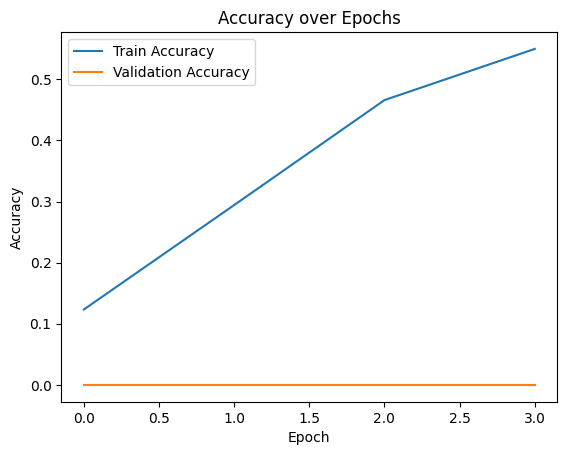

In [19]:
# --- Plot accuracy ---
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



# Plot Loss

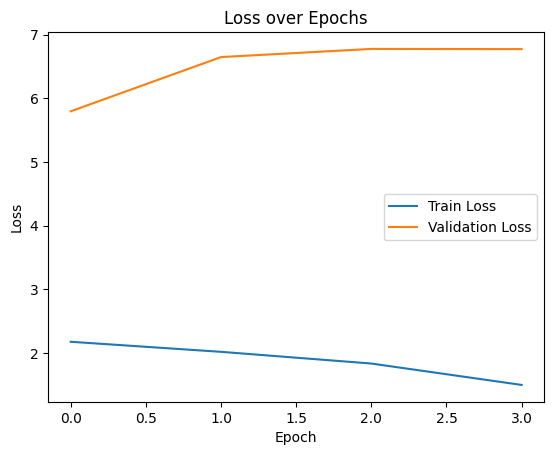

In [20]:
# --- Plot loss ---
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


#Task 5: Evaluate the Model on Test Data

In [21]:
# --- Evaluate on test set ---
test_loss, test_acc = model.evaluate(X_test, y_test_ohe)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1058 - loss: 2.1344
Test Accuracy: 10.00%
Test Loss: 2.8115


# Task 6: Save and Load the Model

# Save the Model

In [22]:
# --- Save model ---
model.save('devnagari_digit_model.keras')
print("Model saved as 'devnagari_digit_model.keras'")


Model saved as 'devnagari_digit_model.keras'


# Load the Model and Re-evaluate

In [30]:
from tensorflow.keras.models import load_model

# --- Load model ---
loaded_model = load_model('devnagari_digit_model.keras')
print("Model loaded.")

# --- Recompile model ---
loaded_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# --- Re-evaluate ---
loss, accuracy = loaded_model.evaluate(X_test, y_test_ohe)
print(f"Loaded Model Test Accuracy: {accuracy * 100:.2f}%")
print(X_test.shape)  # Should be (num_samples, 784)
print(X_test.min(), X_test.max())  # Should be 0.0 and 1.0
print(y_test_ohe.shape)  # Should be (num_samples, 10) for one-hot


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model loaded.
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1058 - loss: 2.1344
Loaded Model Test Accuracy: 10.00%
(3000, 784)
0.0 1.0
(3000, 10)


# Task 7: Make Predictions


=== TASK 7: PREDICTIONS ===
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9101 - loss: 0.3719 - val_accuracy: 0.0000e+00 - val_loss: 8.1233
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9235 - loss: 0.3161 - val_accuracy: 0.0000e+00 - val_loss: 8.4080
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9309 - loss: 0.2862 - val_accuracy: 0.0000e+00 - val_loss: 8.6828
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9382 - loss: 0.2468 - val_accuracy: 0.0000e+00 - val_loss: 8.9501


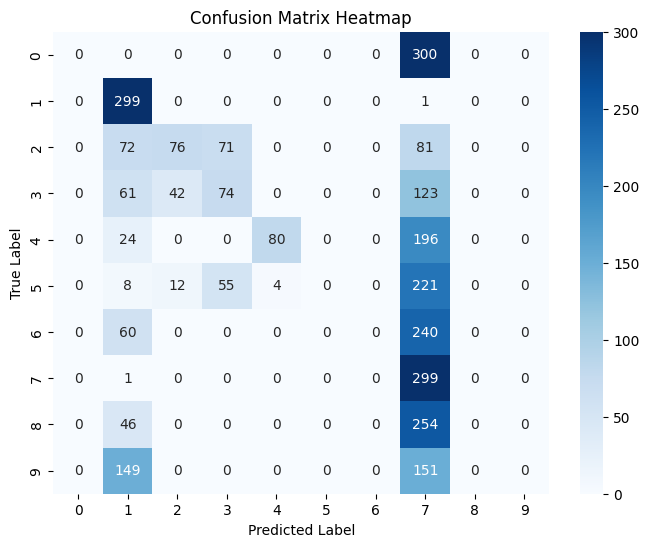


=== ALL TASKS COMPLETED ===


In [52]:
print("\n=== TASK 7: PREDICTIONS ===")

predictions = model.predict(x_test_reshaped)


predicted_labels = np.argmax(predictions, axis=1)
X_train_reshaped = X_train.reshape(X_train.shape[0], 784)  # Flatten images

history = model.fit(X_train_reshaped, y_train_ohe,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[early_stop, checkpoint])




#Confusion matrix for additional insight
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.savefig("confusion_matrix.png")
plt.show()

print("\n=== ALL TASKS COMPLETED ===")